In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis.utils import *
from analysis.parse import *
from analysis.analy import *

In [3]:
# ==== LOAD DREAMCODER
ECTRAIN = "S9.2"
result, tasks, testtasks, programnames, program_test_names, behaviorexpt = loadCheckpoint(trainset=ECTRAIN)


# ===== FOR EACH TASK, PLOT DREAMCODER AND HUMANS
stimname = "S9_nojitter_2"

def getTask(stimname):
    # search thru train, then through test tasks
    for task, name in zip(tasks, programnames):
        if name==stimname:
            return task, "train"
    for task, name in zip(testtasks, program_test_names):
        if name==stimname:
            return task, "test"
        
# === dreamcoder
# get all parses
t = getTask(stimname)[0]
if result.frontiersOverTime[t][-1].empty:
    print("EC NO SOLUTION!!")
else:
    p = result.frontiersOverTime[t][-1].bestPosterior.program
    print(p)
    parses = getParses(p)
    
    

experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=2_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter.pickle
0
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter_graph=True.pickle
6
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=1_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter_graph=True.pickle
1
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=3_MF=5_noCo

In [27]:
# ==== LOAD BEHAVIOR
fname = "../TENENBAUM/drawgood/experiments/data/datall_{}.pickle".format(behaviorexpt)
with open(fname, "rb") as f:
    datall_drawgood = pickle.load(f)

(#(lambda (lambda (lambda (connect $2 (reflect $1 $0))))) (#(lambda (connect (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 line rep2) (#(lambda (lambda (lambda (connect $2 (reflect $1 $0))))) #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) angle6))) None) #(connect (transform (#(lambda (lambda (connect $0 (transform circle (transmat None None (Some $1) None None))))) dist8 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line)) (transmat None (Some angle4) None (Some dist9) None)) (reflect (#(lambda (la

In [ ]:
# plot a few example parses
ECTRAIN = "S9.2"
datflat_ec = parses2datflat([p.flatten() for p in parses], stimname=stimname, condition=ECTRAIN)

DOING SPLIT
FAILED TO LOAD STIM .png file...


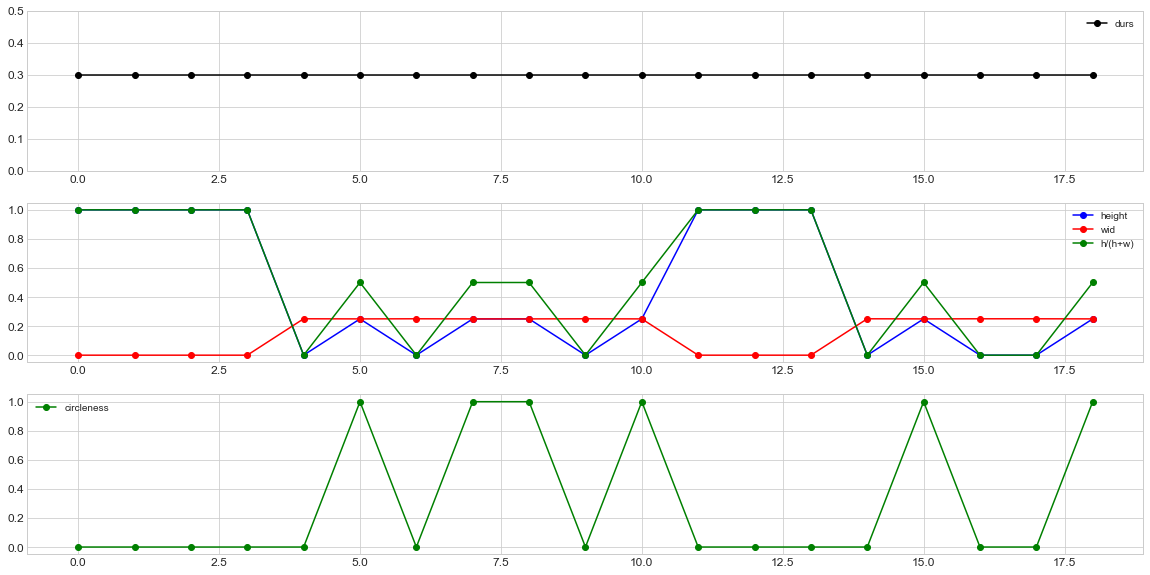

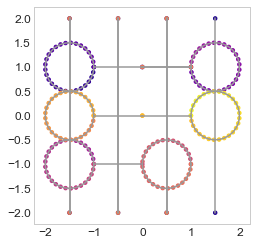

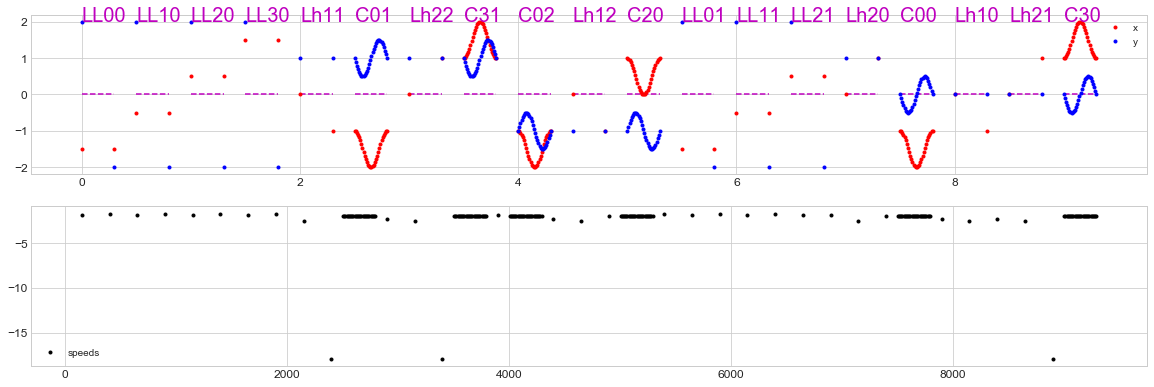

In [55]:
# dgseg.plotDrawing(datflat_ec[0], addstrokelines=True)
dgseg.plotDrawingAndTimecourse(datflat_ec[0], plotUniqueCodes=True, dosplits=True)

DOING SPLIT
doing split (1-->3)
doing split (1-->2)
GETTING UNIQUE CODES
FAILED TO LOAD STIM .png file...
16
16


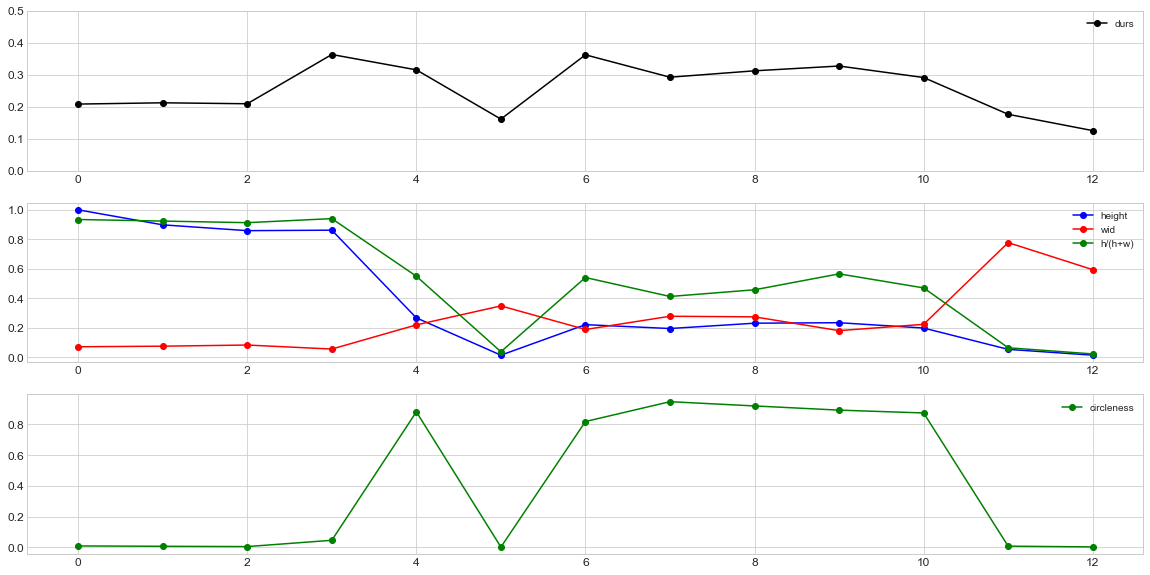

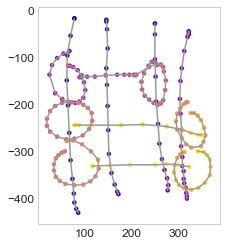

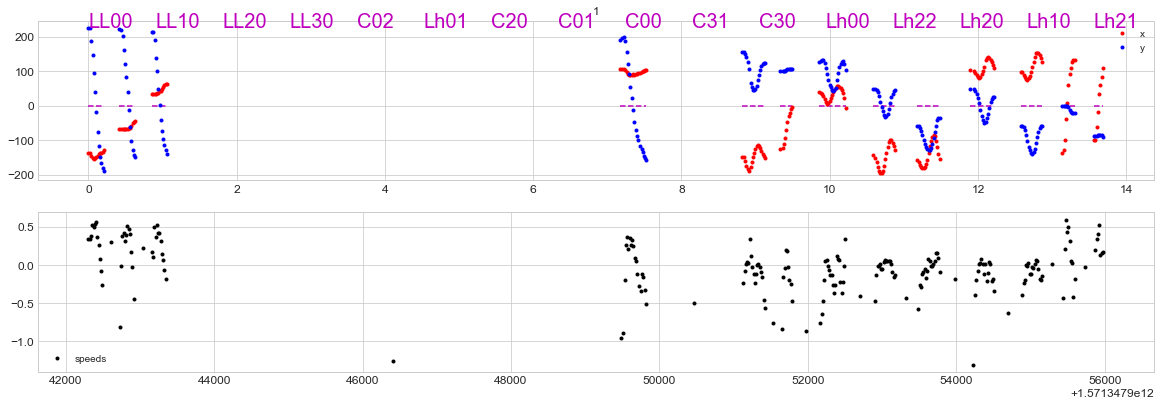

In [137]:
# === human
# get all subjects for this stimulus
# datflat_hu = dgprep.getFlatData(datall_drawgood)
datflat_hu = dgutils.filterDat(dgprep.getFlatData(datall_drawgood), stimlist=["{}.png".format(stimname)])
workers = dgutils.getWorkers(datall_drawgood)

# --- print a random subject
SUBJ=7
datflat_single = dgutils.filterDat(datflat_hu, workernumlist=[SUBJ], stimlist=["{}.png".format(stimname)])
dgseg.plotDrawingAndTimecourse(datflat_single, plotUniqueCodes=True, dosplits=True)

In [97]:
# === dreamcoder + human

# segment parses
# -- for dreamcoder, get a random subset
N = 20
idx_rand = np.random.permutation(range(len(datflat_ec)))[:N]
datflat_ec_rand = [datflat_ec[i] for i in idx_rand]
scores_ec = dgseg.getSegmentation(datflat_ec_rand, unique_codes=True, dosplits=True)
scores_hu = dgseg.getSegmentation(datflat_hu, unique_codes=True, dosplits=True)

# compare parses as strings

[[7.88611145e+01 1.74808960e+01 0.00000000e+00]
 [7.88611145e+01 1.74808960e+01 2.30000000e-02]
 [7.06944275e+01 5.42308960e+01 4.00000000e-02]
 [6.38888855e+01 9.64253540e+01 5.80000000e-02]
 [6.25277710e+01 1.49508667e+02 7.40000000e-02]
 [6.52500000e+01 2.02592010e+02 9.10000000e-02]
 [6.79722290e+01 2.61119812e+02 1.08000000e-01]
 [7.06944275e+01 3.19647583e+02 1.24000000e-01]
 [7.47777710e+01 3.59119812e+02 1.41000000e-01]
 [7.75000000e+01 3.90425354e+02 1.58000000e-01]
 [7.88611145e+01 4.09480896e+02 1.74000000e-01]
 [8.29444275e+01 4.23091980e+02 1.91000000e-01]
 [8.70277710e+01 4.31258667e+02 2.08000000e-01]
 [1.46916656e+02 2.02031250e+01 4.17000000e-01]
 [1.46916656e+02 2.42864685e+01 4.44000000e-01]
 [1.48277771e+02 4.06197815e+01 4.61000000e-01]
 [1.49638885e+02 8.14531250e+01 4.78000000e-01]
 [1.46916656e+02 1.23647552e+02 4.94000000e-01]
 [1.48277771e+02 1.59036469e+02 5.11000000e-01]
 [1.49638885e+02 2.03953125e+02 5.29000000e-01]
 [1.51000000e+02 2.55675354e+02 5.450000

In [81]:
# compare parses as strings

distances = []
for i, s_hu in enumerate(scores_hu):
    for ii, s_ec in enumerate(scores_ec):
        # --- get all distances
        d = stringDist([s["codes_unique"] for s in s_hu],
                       [s["codes_unique"] for s in s_ec])
        distances.append({
            "hum":i,
            "ec":ii,
            "dist":d
        })

['S9_nojitter_22.png',
 'S9_nojitter_112.png',
 'S8_nojitter_9.png',
 'S8_nojitter_25.png',
 'S8_nojitter_14.png',
 'S8_nojitter_21.png',
 'S8_nojitter_73.png',
 'S9_nojitter_0.png',
 'S9_nojitter_34.png',
 'S9_nojitter_5.png',
 'S8_nojitter_3.png',
 'S9_nojitter_30.png',
 'S8_nojitter_20.png',
 'S9_nojitter_56.png',
 'S8_nojitter_24.png',
 'S9_nojitter_32.png',
 'S8_nojitter_2.png',
 'S8_nojitter_11.png',
 'S8_nojitter_18.png',
 'S9_nojitter_108.png',
 'S9_nojitter_19.png',
 'S9_nojitter_8.png',
 'S9_nojitter_39.png',
 'S9_nojitter_25.png',
 'S8_nojitter_32.png',
 'S9_nojitter_28.png',
 'S8_nojitter_10.png',
 'S9_nojitter_37.png',
 'S9_nojitter_47.png',
 'S9_nojitter_7.png',
 'S9_nojitter_135.png',
 'S8_nojitter_23.png',
 'S9_nojitter_43.png',
 'S9_nojitter_3.png',
 'S9_nojitter_13.png',
 'S8_nojitter_5.png',
 'S8_nojitter_7.png',
 'S9_nojitter_21.png',
 'S9_nojitter_14.png',
 'S9_nojitter_42.png',
 'S9_nojitter_41.png',
 'S9_nojitter_46.png',
 'S8_nojitter_17.png',
 'S9_nojitter_59.p

In [ ]:
# ==== for a subject plot trajectory and a bunch of parses in order form best to least similar
HUM = 1
dists = [(d["dist"], d["ec"]) for d in distances if d["hum"]==HUM]

sorted(dists, key=lambda x:x[0])

Ntoplot = 16

indstoplot = np.floor(np.linspace(0, len(dists), Ntoplot))
indstoplot = [int(i) for i in indstoplot]

# -- get human parse
dgseg.plotDrawingAndTimecourse(datflat_hu[HUM], plotUniqueCodes=True, dosplits=True)

plt.figure(figsize=(20,20))
for c, i in enumerate(indstoplot):
    ax = plt.subplot(4,4,c+1)

    # --- get dreamcoder parse
    dgseg.plotDrawing(datflat_ec_rand[i], ax=ax, addstrokelines=True)


In [ ]:
# ===== working with testing tasks
for t in result.getTestingTasks():
    print(result.frontiersOverTime[t][-1])

In [16]:
programnames

['shaping_0',
 'shaping_1',
 'shaping_2',
 'shaping_3',
 'shaping_4',
 'shaping_5',
 'shaping_6',
 'shaping_7',
 'shaping_8',
 'S9_nojitter_shaping_0',
 'S9_nojitter_shaping_1',
 'S9_nojitter_shaping_2',
 'S9_nojitter_shaping_3',
 'S9_nojitter_shaping_4',
 'S9_nojitter_shaping_5',
 'S9_nojitter_shaping_6',
 'S9_nojitter_shaping_7',
 'S9_nojitter_shaping_8',
 'S9_nojitter_shaping_9',
 'S9_nojitter_shaping_10',
 'S9_nojitter_shaping_11',
 'S9_nojitter_shaping_12',
 'S9_nojitter_shaping_13',
 'S9_nojitter_shaping_14',
 'S9_nojitter_shaping_15',
 'S9_nojitter_shaping_16',
 'S9_nojitter_shaping_17',
 'S9_nojitter_shaping_18',
 'S9_nojitter_shaping_19',
 'S9_nojitter_shaping_20',
 'S9_nojitter_shaping_21',
 'S9_nojitter_shaping_22',
 'S9_nojitter_shaping_23',
 'S9_nojitter_shaping_24',
 'S9_nojitter_shaping_25',
 'S9_nojitter_shaping_26',
 'S9_nojitter_shaping_27',
 'S9_nojitter_shaping_28',
 'S9_nojitter_shaping_29',
 'S9_nojitter_shaping_30',
 'S9_nojitter_shaping_31',
 'S9_nojitter_shapin

In [89]:
programnames[66]

'S9_nojitter_19'

In [84]:
# ===== LOAD BEHAVIORAL DATA FROM DRAWGOOD

program_test_names


['test0',
 'test1',
 'test2',
 'test3',
 'test4',
 'test5',
 'test6',
 'test7',
 'test8',
 'test9',
 'test10',
 'test11',
 'test12',
 'test13',
 'test14',
 'test15',
 'test16',
 'test17',
 'test18',
 'test19',
 'test20',
 'test21',
 'test22',
 'test23',
 'test24',
 'test25',
 'test26',
 'test27',
 'test28',
 'test29',
 'test30',
 'test31',
 'test32']

In [45]:
# ===== working with testing tasks
for t in result.getTestingTasks():
    print(result.frontiersOverTime[t][-1])

Frontier(entries=[], task=test0)
Frontier(entries=[], task=test1)
Frontier(entries=[], task=test2)
Frontier(entries=[], task=test3)
Frontier(entries=[], task=test4)
Frontier(entries=[], task=test5)
Frontier(entries=[], task=test6)
Frontier(entries=[], task=test7)
Frontier(entries=[], task=test8)
Frontier(entries=[], task=test9)
Frontier(entries=[], task=test10)
Frontier(entries=[], task=test11)
Frontier(entries=[FrontierEntry(program=(reflect (#(lambda (lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (connect $0 (reflect $1 angle6)) $2)))) rep3 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) (transform (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some 

In [56]:
result.frontiersOverTime[testtasks[12]][-1].bestPosterior

FrontierEntry(program=(reflect (#(lambda (lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (connect $0 (reflect $1 angle6)) $2)))) rep3 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) line) angle4), logPrior=-3.8411804173055772, logLikelihood=0.0

In [65]:

import bin.graphs as G
G.getLikelihood("MAP", result, testtasks[12], 5, False)

NameError: name 'arguments' is not defined

In [58]:
from dreamcoder.domains.draw.drawPrimitives import *
from dreamcoder.domains.draw.primitives import _repeat, _line, _makeAffine, _circle,_connect
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks, SupervisedDraw
from dreamcoder.dreamcoder import ecIterator
from dreamcoder.grammar import Grammar
import numpy as np



In [ ]:
# count the number of parses for each program

for i in range(len(tasks)):
    try:
        parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program)))
        print("task {}, num parses: {}".format(i, len(parses)))
    except:
        continue
    
    # === for each parse, flatten
#     for parse in parses:
        

task 0, num parses: 1
task 2, num parses: 1
task 3, num parses: 1
task 5, num parses: 1
task 6, num parses: 1
task 7, num parses: 1
task 8, num parses: 1
task 9, num parses: 1
task 10, num parses: 2
task 11, num parses: 2
task 12, num parses: 2
task 13, num parses: 8
task 14, num parses: 4
task 15, num parses: 4
task 16, num parses: 4
task 18, num parses: 2
task 19, num parses: 2
task 20, num parses: 4
task 22, num parses: 2
task 23, num parses: 2
task 24, num parses: 2
task 25, num parses: 1
task 26, num parses: 1
task 27, num parses: 8
task 28, num parses: 4
task 29, num parses: 8
task 30, num parses: 16
task 32, num parses: 16
task 33, num parses: 16
task 34, num parses: 32
task 36, num parses: 16
task 37, num parses: 768
task 39, num parses: 64
task 40, num parses: 32
task 41, num parses: 64
task 43, num parses: 32
task 44, num parses: 32
task 45, num parses: 64
task 46, num parses: 512
task 56, num parses: 2
task 63, num parses: 8
task 74, num parses: 4


In [154]:
# === do segmentation using beahvilral code
# === how long does it take to get segmentation codes for N parses?
import timeit
start_time = timeit.default_timer()


i=77
parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program))) # get all parses for this program
datflat = parses2datflat(parses) # convert parses to one datflat object
datsegs = DGseg.getSegmentation([datflat[0]], False) # get string codes for each parse


elapsed = timeit.default_timer() - start_time
print(elapsed)




4.0
[-6.123233995736766e-17, 0.5000000000000001, -0.49999999999999983, -1.4999999999999996, 0.9999999999999999, 0.9999999999999999, 2.0, 6.123233995736765e-17, -1.4999999999999996, -0.49999999999999983, 0.5000000000000001, 1.5000000000000004]
4.8633429069996055


In [158]:
[d["codes"] for d in datsegs[0]]

['C', 'LL', 'LL', 'LL', 'L', 'L', 'C', 'L', 'LL', 'LL', 'LL', 'LL']

4.0
[-6.123233995736766e-17, 0.5000000000000001, -0.49999999999999983, -1.4999999999999996, 0.9999999999999999, 0.9999999999999999, 2.0, 6.123233995736765e-17, -1.4999999999999996, -0.49999999999999983, 0.5000000000000001, 1.5000000000000004]
FAILED TO LOAD STIM .png file...
{'circleness': 1.0, 'badstroke': False, 'height': 0.24963335346278095, 'width': 0.2848768510220513, 'h_rel_hplusw': 0.46703196939594593, 'on_xy': array([-6.123234e-17,  6.123234e-17]), 'off_xy': array([-6.123234e-17, -6.123234e-17]), 'centerpos': array([-0.47293055,  0.        ]), 'x_extremes': [-0.9970689785771799, -6.123233995736766e-17], 'y_extremes': [-0.49926670692556196, 0.49926670692556185], 'codes': 'C'}
ASASDASD
<class 'tuple'>
{'circleness': 1.0, 'badstroke': False, 'height': 0.24963335346278095, 'width': 0.2848768510220513, 'h_rel_hplusw': 0.46703196939594593, 'on_xy': array([-6.123234e-17,  6.123234e-17]), 'off_xy': array([-6.123234e-17, -6.123234e-17]), 'centerpos': array([-0.47293055,  0.        ]), '

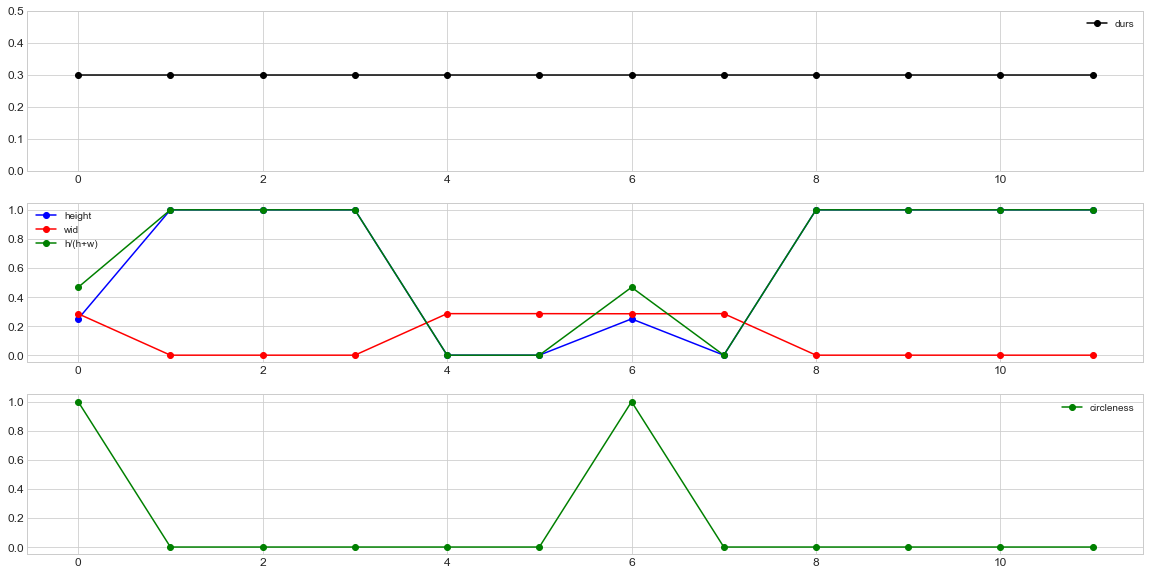

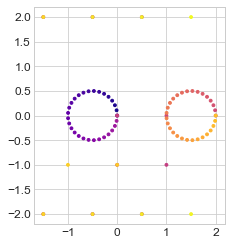

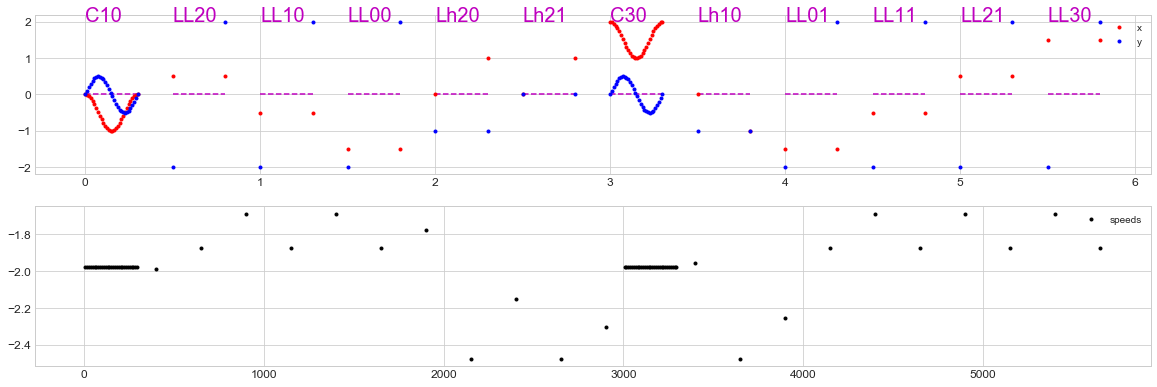

In [199]:
# === plot a single trial
DGseg.plotDrawingAndTimecourse(datflat[0], connectDots=False, plotUniqueCodes=True)

In [10]:
# === for each parse from each program, do 
for i in range(len(tasks)):
    try:
        parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program)))
        print("task {}, num parses: {}".format(i, len(parses)))
    except:
        continue


[array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.88310278e-01,  1.07485220e-01],
       [ 9.53787710e-01,  2.09944551e-01],
       [ 8.98046533e-01,  3.02587108e-01],
       [ 8.23693142e-01,  3.81081028e-01],
       [ 7.34204220e-01,  4.41756022e-01],
       [ 6.33764169e-01,  4.81774996e-01],
       [ 5.27069454e-01,  4.99266707e-01],
       [ 4.19109002e-01,  4.93413261e-01],
       [ 3.14930922e-01,  4.64488360e-01],
       [ 2.19406467e-01,  4.13844499e-01],
       [ 1.37002254e-01,  3.43849729e-01],
       [ 7.15714119e-02,  2.57776929e-01],
       [ 2.61734144e-02,  1.59650765e-01],
       [ 2.93102142e-03,  5.40595092e-02],
       [ 2.93102142e-03, -5.40595092e-02],
       [ 2.61734144e-02, -1.59650765e-01],
       [ 7.15714119e-02, -2.57776929e-01],
       [ 1.37002254e-01, -3.43849729e-01],
       [ 2.19406467e-01, -4.13844499e-01],
       [ 3.14930922e-01, -4.64488360e-01],
       [ 4.19109002e-01, -4.93413261e-01],
       [ 5.27069454e-01, -4.99266707e-01],
       [ 6

In [186]:
# ===== classify all primitives into their column

datseg_single = datsegs[0]

getUniqueCode(datseg_single)

    
# 4) draw a pritmive-only parsed version, with sequnece


# 5) draw a timecourse (on/off), with syls and gaps


[0.]
[2.4492936e-16]
[0. 0.]
[0. 0.]
[0. 0.]
[0.]
[-1.]
[-1.0000000e+00  1.2246468e-16]


['C10',
 'LL20',
 'LL10',
 'LL00',
 'L20',
 'L21',
 'C30',
 'L10',
 'LL01',
 'LL11',
 'LL21',
 'LL30']

In [189]:
datsegs[0][0]

{'circleness': 1.0,
 'badstroke': False,
 'height': 0.24963335346278095,
 'width': 0.2848768510220513,
 'h_rel_hplusw': 0.46703196939594593,
 'on_xy': array([-6.123234e-17,  6.123234e-17]),
 'off_xy': array([-6.123234e-17, -6.123234e-17]),
 'centerpos': array([-0.47293055,  0.        ]),
 'x_extremes': [-0.9970689785771799, -6.123233995736766e-17],
 'y_extremes': [-0.49926670692556196, 0.49926670692556185],
 'codes': 'C',
 'codes_unique': 'C10'}

In [167]:
from operator import itemgetter
print(itemgetter())

<class 'operator.itemgetter'>


In [144]:
a = np.array([1,2,3])
b = np.concatenate((np.array([-100]), a))
print(b)

[-100    1    2    3]


In [49]:
centers[0]

array([0.5, 0. ])

In [8]:
## ====== PROBLEM - THIS SHOULD GIVE 6 PAREES, BUT ISNTEAD ONLY GIVES 3. 
# NOTE: WORKS FINE IF (1) USE (TRANSFORM LINE) INSTEAD OF LINE, OR (2) USE #(CONNECT CIFCLE CIRLCE))

p = Program.parse("(connect line (connect circle circle))")
PP = Parse.ofProgram(p)
print(len(PP))
for p in PP:
    print(p)

Parse.animate_all(PP, "/tmp/parses.png")


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3
Parse([array([[0., 0.],
       [1., 0.]]), array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
       [ 